In [ ]:
import pandas as pd
df = pd.read_csv('캠페인_페이스북 광고 데이터_표.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                1475 non-null   object 
 1   Ad name                      1475 non-null   object 
 2   Ad creative image URL        1472 non-null   object 
 3   Omni purchases               1475 non-null   int64  
 4   Return on ad spend (ROAS)    1470 non-null   float64
 5   Website checkouts initiated  1475 non-null   int64  
 6   Omni adds to cart            1475 non-null   int64  
 7   Amount spent                 1475 non-null   int64  
 8   Clicks (all)                 1475 non-null   int64  
 9   Amount spent.1               1475 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 115.4+ KB


In [ ]:
grouped_df = df.groupby('Campaign name').agg({
    'Omni purchases': 'sum',
    'Return on ad spend (ROAS)': 'mean',
    'Website checkouts initiated': 'sum',
    'Omni adds to cart': 'sum',
    'Amount spent': 'sum',
    'Clicks (all)': 'sum'
}).reset_index()

grouped_df

,Campaign name,Omni purchases,Return on ad spend (ROAS),Website checkouts initiated,Omni adds to cart,Amount spent,Clicks (all)
0,2월_결제시작전환(신규포함)_타겟수정_0221,2,0.130095,9,4,108416,147
1,2월_구매전환(신규포함)_0203,3,0.760746,11,11,170352,284
2,2월_구매전환(신규포함)_타겟수정_0206,118,2.132020,237,83,1851500,2617
3,2월_구매전환(신규포함)_타겟수정_결과당비용목표_0208,38,3.077431,60,17,476722,797
4,2월_트래픽(신규포함)_타겟수정_0206,14,0.625967,38,32,857957,4992
...,...,...,...,...,...,...,...
90,트래픽_자마노_0707,3,0.094283,9,6,217409,1751
91,트래픽_카네스톤_0428,72,0.682977,205,199,3433658,23486
92,트래픽_키링_0310,6,0.060451,23,26,638832,3287
93,트래픽_터키수에르 체인_1019,0,0.000000,5,5,242183,1285


In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                95 non-null     object 
 1   Omni purchases               95 non-null     int64  
 2   Return on ad spend (ROAS)    95 non-null     float64
 3   Website checkouts initiated  95 non-null     int64  
 4   Omni adds to cart            95 non-null     int64  
 5   Amount spent                 95 non-null     int64  
 6   Clicks (all)                 95 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
grouped_df['Amount spent'].describe()

count    9.500000e+01
mean     2.193763e+06
std      5.276321e+06
min      2.971300e+04
25%      2.784920e+05
50%      6.388320e+05
75%      1.648250e+06
max      3.752907e+07
Name: Amount spent, dtype: float64

In [ ]:
grouped_df['Omni purchases'].describe()

count      95.000000
mean      107.610526
std       289.527469
min         0.000000
25%         4.500000
50%        16.000000
75%        69.500000
max      2090.000000
Name: Omni purchases, dtype: float64

- 광고비, roas

In [ ]:
grouped_df['Return on ad spend (ROAS)'].describe()

count    95.000000
mean      1.304601
std       1.438376
min       0.000000
25%       0.370713
50%       0.887112
75%       1.708113
max       9.134990
Name: Return on ad spend (ROAS), dtype: float64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 다항 특성 추가
degree = 2 # 다항식 차수
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(grouped_df[['Amount spent']])

# 다항 회귀 모델 학습
model = LinearRegression()
model.fit(X_poly, grouped_df['Return on ad spend (ROAS)'])

# 예측값 계산
y_pred = model.predict(X_poly)

# 모델 성능 평가
mse = mean_squared_error(grouped_df['Return on ad spend (ROAS)'], y_pred)
r2 = r2_score(grouped_df['Return on ad spend (ROAS)'], y_pred)

print(f'Degree {degree} 다항 회귀 모델 성능:')
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

Degree 2 다항 회귀 모델 성능:
MSE: 1.78
R^2: 0.13


- 광고비, 구매 수
    - 과적합의 우려가 있지만 단순 선형 회귀 good
    - y = 5.326574096208859e-05x + -9.68

In [ ]:
grouped_df['Omni purchases'].describe()

count      95.000000
mean      107.610526
std       289.527469
min         0.000000
25%         4.500000
50%        16.000000
75%        69.500000
max      2090.000000
Name: Omni purchases, dtype: float64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 다항 특성 추가
degree = 2 # 다항식 차수
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(grouped_df[['Amount spent']])

# 다항 회귀 모델 학습
model = LinearRegression()
model.fit(X_poly, grouped_df['Omni purchases'])

# 예측값 계산
y_pred = model.predict(X_poly)

# 모델 성능 평가
mae = mean_absolute_error(grouped_df['Omni purchases'], y_pred)
mse = mean_squared_error(grouped_df['Omni purchases'], y_pred)
r2 = r2_score(grouped_df['Omni purchases'], y_pred)

print(f'Degree {degree} 다항 회귀 모델 성능:')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

Degree 2 다항 회귀 모델 성능:
MAE: 14.04
MSE: 630.59
R^2: 0.99


> MAE (Mean Absolute Error): 14.04
- 예측값과 실제 값 사이의 평균 절대 오차를 나타내며, 값이 작을수록 모델의 예측 성능이 좋습니다.
- 주어진 데이터의 y 값의 중간값(median)은 16이고, MAE가 14.04로 나타나 있습니다. MAE가 중간값보다 크지 않고, 데이터의 75% 백분위수와도 비슷한 수준입니다. 따라서 전반적으로 모델이 적절한 예측을 수행하고 있음을 나타냅니다.

>MSE (Mean Squared Error): 630.59
- 예측값과 실제 값 사이의 평균 제곱 오차를 나타냅니다. MSE도 작을수록 모델의 예측 성능이 좋습니다.
- 주어진 데이터의 분포를 고려할 때, MSE의 값이 크지 않고, 데이터의 75% 백분위수와 유사한 범위입니다. 이는 모델이 전체적으로 데이터의 분포를 잘 반영하고 있는 것을 시사합니다.

> R^2(R-squared): 0.99

- 모델이 설명하는 데이터의 변동성을 나타내며, 1에 가까울수록 좋은 모델입니다.
주어진
- R^2(R-squared)값은 0.99로 매우 높은 수준입니다. 이는 모델이 데이터의 변동성을 매우 잘 설명하고 있다는 것을 의미합니다.


> 우려되는 거 : 과적합

C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\l

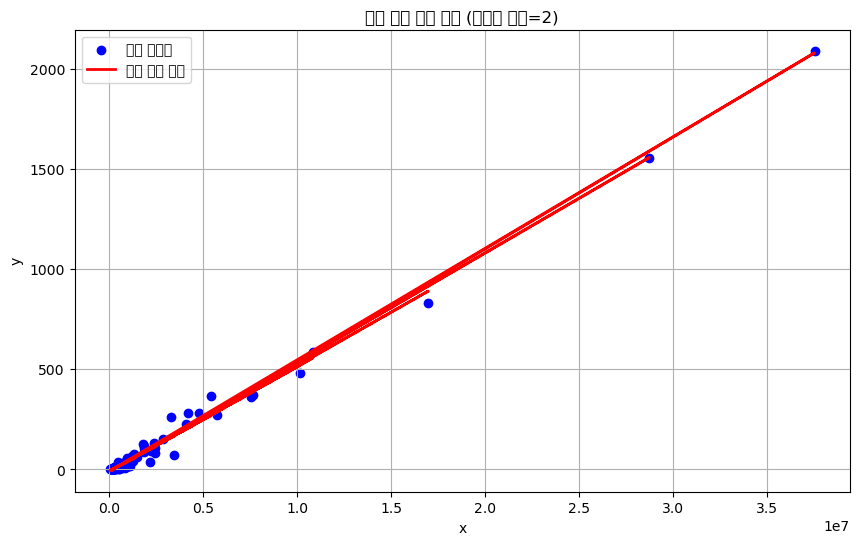

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# 일단 시각화
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df[['Amount spent']], grouped_df['Omni purchases'], color='blue', label='실제 데이터')
plt.plot(grouped_df[['Amount spent']], y_pred, color='red', linewidth=2, label='다항 회귀 예측')
plt.title(f'다항 회귀 예측 결과 (다항식 차수={degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

> 굳이 다항? 그냥 선형해도 될 듯

In [ ]:
df = pd.read_csv('캠페인_페이스북 광고 데이터_표.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                1475 non-null   object 
 1   Ad name                      1475 non-null   object 
 2   Ad creative image URL        1472 non-null   object 
 3   Omni purchases               1475 non-null   int64  
 4   Return on ad spend (ROAS)    1470 non-null   float64
 5   Website checkouts initiated  1475 non-null   int64  
 6   Omni adds to cart            1475 non-null   int64  
 7   Amount spent                 1475 non-null   int64  
 8   Clicks (all)                 1475 non-null   int64  
 9   Amount spent.1               1475 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 115.4+ KB


In [ ]:
grouped_df = df.groupby('Campaign name').agg({
    'Omni purchases': 'sum',
    'Return on ad spend (ROAS)': 'mean',
    'Website checkouts initiated': 'sum',
    'Omni adds to cart': 'sum',
    'Amount spent': 'sum',
    'Clicks (all)': 'sum'
}).reset_index()
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                95 non-null     object 
 1   Omni purchases               95 non-null     int64  
 2   Return on ad spend (ROAS)    95 non-null     float64
 3   Website checkouts initiated  95 non-null     int64  
 4   Omni adds to cart            95 non-null     int64  
 5   Amount spent                 95 non-null     int64  
 6   Clicks (all)                 95 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 피처와 타겟 변수 분리
X_ad = grouped_df['Amount spent'].values.reshape(-1, 1)
y_ad = grouped_df['Omni purchases'].values.reshape(-1, 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_ad, y_train_ad)

# 예측
y_pred_ad = model.predict(X_test_ad)

# 평가
mae = mean_absolute_error(y_test_ad, y_pred_ad)
mse = mean_squared_error(y_test_ad, y_pred_ad)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_ad, y_pred_ad)

print('선형 단순 회귀 모델 성능:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

선형 단순 회귀 모델 성능:
MAE: 11.61511554243967
MSE: 637.6429916326531
RMSE: 25.251593843412202
R^2: 0.9970480128650732


> MAE (Mean Absolute Error): 11.62
- 예측값과 실제 값 사이의 평균 절대 오차를 나타냅니다. 값이 작을수록 모델의 예측 성능이 좋습니다.
- 주어진 데이터의 y 값의 중간값(median)은 16이고, MAE가 11.62로 나타나 있습니다. MAE가 중간값보다 작고, 데이터의 75% 백분위수와도 비슷한 수준입니다. 따라서 전반적으로 모델이 양호한 예측을 수행하고 있음을 나타냅니다.

> MSE (Mean Squared Error): 637.64
- 예측값과 실제 값 사이의 평균 제곱 오차를 나타냅니다. MSE도 작을수록 모델의 예측 성능이 좋습니다.
- 주어진 데이터의 분포를 고려할 때, MSE의 값이 크지 않고, 데이터의 75% 백분위수와 유사한 범위입니다. 이는 모델이 전체적으로 데이터의 분포를 잘 반영하고 있는 것을 시사합니다.

> RMSE (Root Mean Squared Error): 25.25
- MSE의 제곱근을 나타내며, 실제 값과 같은 단위를 갖습니다. RMSE도 작을수록 모델의 예측 성능이 좋습니다.
- 주어진 데이터의 범위를 고려할 때, RMSE의 값도 크지 않으며, MAE와 비슷한 결과를 보입니다.

> R^2(R-squared): 0.997
- 모델이 설명하는 데이터의 변동성을 나타냅니다. 1에 가까울수록 좋은 모델입니다.
- 주어진 R^2(R-squared)값은 0.997로 매우 높습니다. 이는 모델이 데이터의 대부분의 변동을 잘 설명하고 있다는 것을 의미합니다.

In [ ]:
len(y_pred_ad)

19

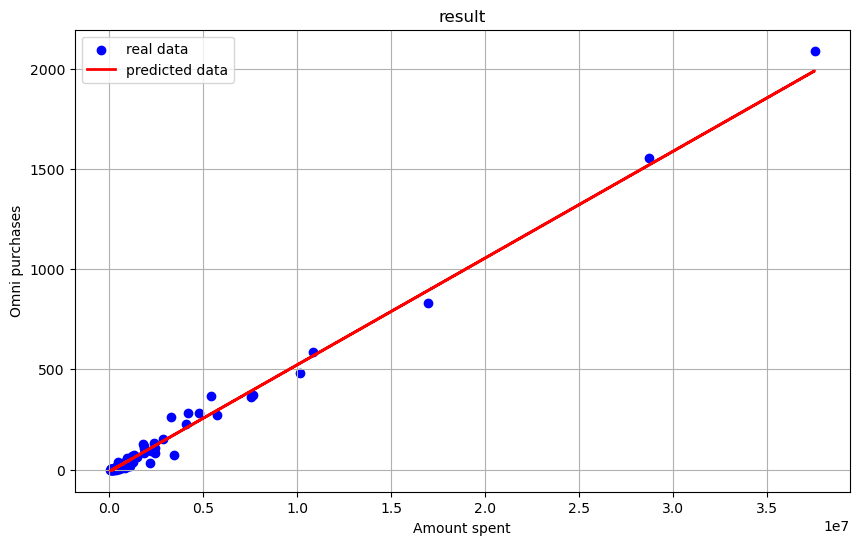

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad, y_ad, color='blue', label='real data')
plt.plot(X_test_ad, y_pred_ad, color='red', linewidth=2, label='predicted data')
plt.title('result')
plt.xlabel('Amount spent')
plt.ylabel('Omni purchases')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 모델의 계수와 절편 확인
coef = model.coef_[0][0]  # 모델의 계수 (기울기)
intercept = model.intercept_[0]  # 모델의 절편

# 예측된 선의 식 출력
print(f'예측된 선의 식: y = {coef}x + {intercept:.2f}')

예측된 선의 식: y = 5.326574096208859e-05x + -9.68


- 광고비, 구매수 -> 표준화로 이상치 제거
    - 일반적으로 평균에서 3 표준 편차 이상 떨어진 값을 이상치로 정의
    - 이는 정규 분포를 따르는 데이터에서 약 99.7%가 평균으로부터 3 표준 편차 이내에 위치하기 때문
        - Amount spent 97.89%
        - Omni purchases 97.89%

In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                95 non-null     object 
 1   Omni purchases               95 non-null     int64  
 2   Return on ad spend (ROAS)    95 non-null     float64
 3   Website checkouts initiated  95 non-null     int64  
 4   Omni adds to cart            95 non-null     int64  
 5   Amount spent                 95 non-null     int64  
 6   Clicks (all)                 95 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
# x와 y의 평균과 표준 편차 계산
mean_x = grouped_df['Amount spent'].mean()
std_x = grouped_df['Amount spent'].std()
mean_y = grouped_df['Omni purchases'].mean()
std_y = grouped_df['Omni purchases'].std()

# x와 y의 이상치 경계 계산 (3 표준 편차 사용)
lower_bound_x = mean_x - 3 * std_x
upper_bound_x = mean_x + 3 * std_x
lower_bound_y = mean_y - 3 * std_y
upper_bound_y = mean_y + 3 * std_y

# x와 y 모두에서 이상치가 아닌 값 선택
df = grouped_df[(grouped_df['Amount spent'] >= lower_bound_x) & (grouped_df['Amount spent'] <= upper_bound_x) &
                 (grouped_df['Omni purchases'] >= lower_bound_y) & (grouped_df['Omni purchases'] <= upper_bound_y)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                93 non-null     object 
 1   Omni purchases               93 non-null     int64  
 2   Return on ad spend (ROAS)    93 non-null     float64
 3   Website checkouts initiated  93 non-null     int64  
 4   Omni adds to cart            93 non-null     int64  
 5   Amount spent                 93 non-null     int64  
 6   Clicks (all)                 93 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.8+ KB


In [ ]:
# x와 y의 이상치가 아닌 값의 비율 계산
within_bounds_x = grouped_df[(grouped_df['Amount spent'] >= lower_bound_x) & (grouped_df['Amount spent'] <= upper_bound_x)]
within_bounds_y = grouped_df[(grouped_df['Omni purchases'] >= lower_bound_y) & (grouped_df['Omni purchases'] <= upper_bound_y)]

# 비율 계산
proportion_x = len(within_bounds_x) / len(grouped_df)
proportion_y = len(within_bounds_y) / len(grouped_df)

print("Proportion of 'Amount spent' within 3 standard deviations:", proportion_x)
print("Proportion of 'Omni purchases' within 3 standard deviations:", proportion_y)

Proportion of 'Amount spent' within 3 standard deviations: 0.9789473684210527
Proportion of 'Omni purchases' within 3 standard deviations: 0.9789473684210527


In [ ]:
# 'Amount spent'에서 이상치인 'C name' 추출
outliers_x = grouped_df[~grouped_df['Campaign name'].isin(within_bounds_x['Campaign name'])]

# 'Omni purchases'에서 이상치인 'C name' 추출
outliers_y = grouped_df[~grouped_df['Campaign name'].isin(within_bounds_y['Campaign name'])]['Campaign name']

In [ ]:
outliers_x

,Campaign name,Omni purchases,Return on ad spend (ROAS),Website checkouts initiated,Omni adds to cart,Amount spent,Clicks (all)
16,구매전환_레브스톤_21-65_여성_0715,1556,1.667675,2949,3503,28732729,48616
73,전환_어드밴티지+ 쇼핑 캠페인 2023-03-16 캠페인,2090,2.983251,3496,1740,37529074,49656


In [ ]:
outliers_y

16            구매전환_레브스톤_21-65_여성_0715
73    전환_어드밴티지+ 쇼핑 캠페인 2023-03-16 캠페인
Name: Campaign name, dtype: object

In [ ]:
len(grouped_df[grouped_df['Campaign name'].str.contains('어드밴티지', na=False)])

18

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 피처와 타겟 변수 분리
X_ad = df['Amount spent'].values.reshape(-1, 1)
y_ad = df['Omni purchases'].values.reshape(-1, 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_ad, y_train_ad)

# 예측
y_pred_ad = model.predict(X_test_ad)

# 평가
mae = mean_absolute_error(y_test_ad, y_pred_ad)
mse = mean_squared_error(y_test_ad, y_pred_ad)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_ad, y_pred_ad)

print('선형 단순 회귀 모델 성능:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

선형 단순 회귀 모델 성능:
MAE: 10.347043650107238
MSE: 216.92665157788383
RMSE: 14.72843004457311
R^2: 0.9712375163646402


In [ ]:
df['Omni purchases'].describe()

count     93.000000
mean      70.720430
std      136.946385
min        0.000000
25%        4.000000
50%       16.000000
75%       62.000000
max      833.000000
Name: Omni purchases, dtype: float64

In [ ]:
len(X_ad)

93

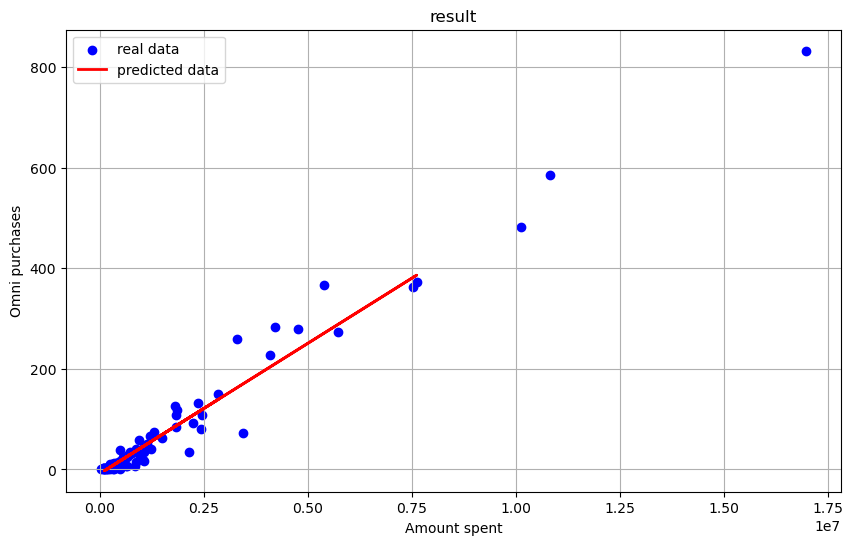

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad, y_ad, color='blue', label='real data')
plt.plot(X_test_ad, y_pred_ad, color='red', linewidth=2, label='predicted data')
plt.title('result')
plt.xlabel('Amount spent')
plt.ylabel('Omni purchases')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 모델의 계수와 절편 확인
coef = model.coef_[0][0]  # 모델의 계수 (기울기)
intercept = model.intercept_[0]  # 모델의 절편

# 예측된 선의 식 출력
print(f'예측된 선의 식: y = {coef}x + {intercept:.2f}')''

예측된 선의 식: y = 5.181120386164761e-05x + -8.22


In [ ]:
# MAE: 10.3

In [ ]:
# R^2: 0.97

- 이상치 중 어드밴티치만 제거

In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                95 non-null     object 
 1   Omni purchases               95 non-null     int64  
 2   Return on ad spend (ROAS)    95 non-null     float64
 3   Website checkouts initiated  95 non-null     int64  
 4   Omni adds to cart            95 non-null     int64  
 5   Amount spent                 95 non-null     int64  
 6   Clicks (all)                 95 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
# 이상치를 일단 제거하고

# x와 y의 평균과 표준 편차 계산
mean_x = grouped_df['Amount spent'].mean()
std_x = grouped_df['Amount spent'].std()
mean_y = grouped_df['Omni purchases'].mean()
std_y = grouped_df['Omni purchases'].std()

# x와 y의 이상치 경계 계산 (3 표준 편차 사용)
lower_bound_x = mean_x - 3 * std_x
upper_bound_x = mean_x + 3 * std_x
lower_bound_y = mean_y - 3 * std_y
upper_bound_y = mean_y + 3 * std_y

# x와 y 모두에서 이상치가 아닌 값 선택
df = grouped_df[(grouped_df['Amount spent'] >= lower_bound_x) & (grouped_df['Amount spent'] <= upper_bound_x) &
                 (grouped_df['Omni purchases'] >= lower_bound_y) & (grouped_df['Omni purchases'] <= upper_bound_y)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                93 non-null     object 
 1   Omni purchases               93 non-null     int64  
 2   Return on ad spend (ROAS)    93 non-null     float64
 3   Website checkouts initiated  93 non-null     int64  
 4   Omni adds to cart            93 non-null     int64  
 5   Amount spent                 93 non-null     int64  
 6   Clicks (all)                 93 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.8+ KB


In [ ]:
# 수동인 거는 다시 포함시켜

# 새로운 행을 기존 데이터프레임에 추가
df = pd.concat([grouped_df[grouped_df['Campaign name'] == '구매전환_레브스톤_21-65_여성_0715'], df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                94 non-null     object 
 1   Omni purchases               94 non-null     int64  
 2   Return on ad spend (ROAS)    94 non-null     float64
 3   Website checkouts initiated  94 non-null     int64  
 4   Omni adds to cart            94 non-null     int64  
 5   Amount spent                 94 non-null     int64  
 6   Clicks (all)                 94 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 피처와 타겟 변수 분리
X_ad = df['Amount spent'].values.reshape(-1, 1)
y_ad = df['Omni purchases'].values.reshape(-1, 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_ad, y_train_ad)

# 예측
y_pred_ad = model.predict(X_test_ad)

# 평가
mae = mean_absolute_error(y_test_ad, y_pred_ad)
mse = mean_squared_error(y_test_ad, y_pred_ad)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_ad, y_pred_ad)

print('선형 단순 회귀 모델 성능:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

선형 단순 회귀 모델 성능:
MAE: 15.24177719427812
MSE: 860.5978353656213
RMSE: 29.335947834791725
R^2: 0.9928152353618628


In [ ]:
df['Omni purchases'].describe()

count      94.000000
mean       86.521277
std       204.991042
min         0.000000
25%         4.250000
50%        16.000000
75%        65.750000
max      1556.000000
Name: Omni purchases, dtype: float64

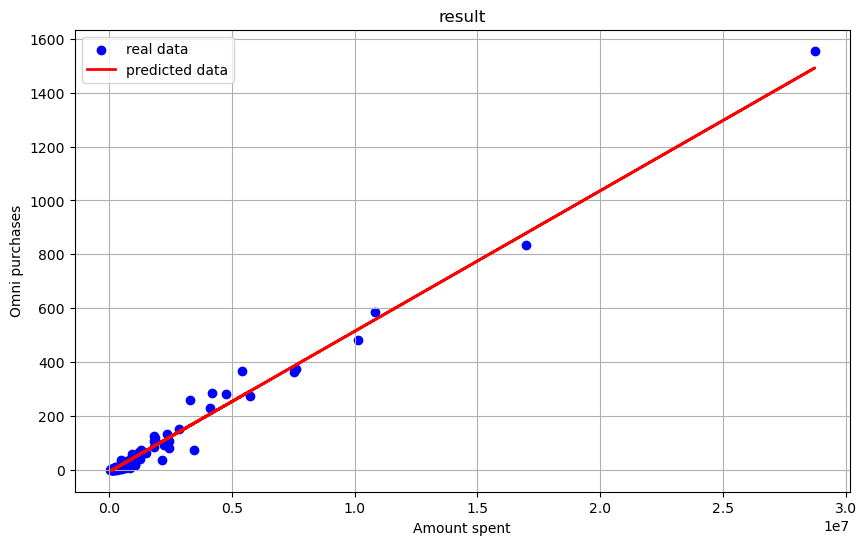

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad, y_ad, color='blue', label='real data')
plt.plot(X_test_ad, y_pred_ad, color='red', linewidth=2, label='predicted data')
plt.title('result')
plt.xlabel('Amount spent')
plt.ylabel('Omni purchases')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 모델의 계수와 절편 확인
coef = model.coef_[0][0]  # 모델의 계수 (기울기)
intercept = model.intercept_[0]  # 모델의 절편

# 예측된 선의 식 출력
print(f'예측된 선의 식: y = {coef}x + {intercept:.2f}')

예측된 선의 식: y = 5.217166038923006e-05x + -7.39


- 어드밴티지 다 빼고

In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                95 non-null     object 
 1   Omni purchases               95 non-null     int64  
 2   Return on ad spend (ROAS)    95 non-null     float64
 3   Website checkouts initiated  95 non-null     int64  
 4   Omni adds to cart            95 non-null     int64  
 5   Amount spent                 95 non-null     int64  
 6   Clicks (all)                 95 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
df = grouped_df[~grouped_df['Campaign name'].str.contains('어드밴티지', case=False, na=False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                77 non-null     object 
 1   Omni purchases               77 non-null     int64  
 2   Return on ad spend (ROAS)    77 non-null     float64
 3   Website checkouts initiated  77 non-null     int64  
 4   Omni adds to cart            77 non-null     int64  
 5   Amount spent                 77 non-null     int64  
 6   Clicks (all)                 77 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 4.8+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 피처와 타겟 변수 분리
X_ad = df['Amount spent'].values.reshape(-1, 1)
y_ad = df['Omni purchases'].values.reshape(-1, 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_ad, y_train_ad)

# 예측
y_pred_ad = model.predict(X_test_ad)

# 평가
mae = mean_absolute_error(y_test_ad, y_pred_ad)
mse = mean_squared_error(y_test_ad, y_pred_ad)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_ad, y_pred_ad)

print('선형 단순 회귀 모델 성능:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

선형 단순 회귀 모델 성능:
MAE: 13.03256421491366
MSE: 450.7124075167636
RMSE: 21.2299884012395
R^2: 0.9169585965123822


In [ ]:
df['Omni purchases'].describe()

count      77.000000
mean       87.597403
std       218.873868
min         0.000000
25%         6.000000
50%        16.000000
75%        62.000000
max      1556.000000
Name: Omni purchases, dtype: float64

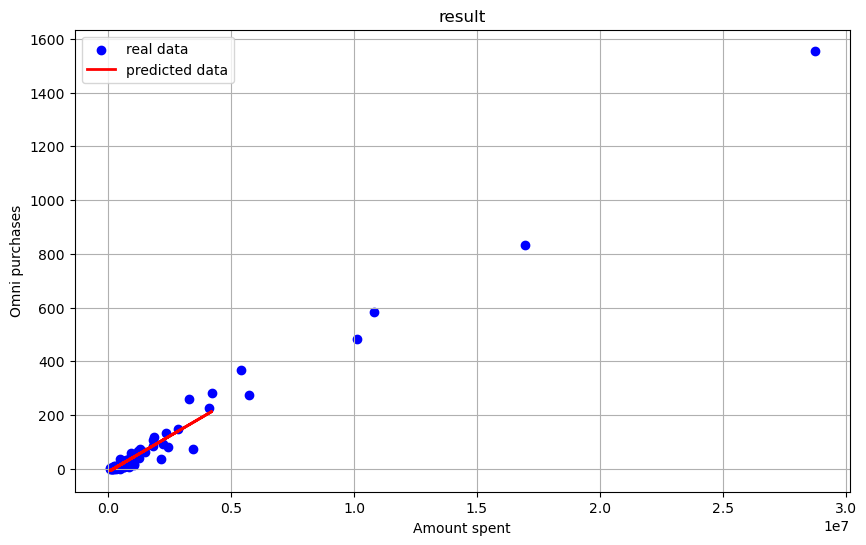

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad, y_ad, color='blue', label='real data')
plt.plot(X_test_ad, y_pred_ad, color='red', linewidth=2, label='predicted data')
plt.title('result')
plt.xlabel('Amount spent')
plt.ylabel('Omni purchases')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 모델의 계수와 절편 확인
coef = model.coef_[0][0]  # 모델의 계수 (기울기)
intercept = model.intercept_[0]  # 모델의 절편

# 예측된 선의 식 출력
print(f'예측된 선의 식: y = {coef}x + {intercept:.2f}')

예측된 선의 식: y = 5.331924769248447e-05x + -11.34


- 로그 함수 (어드밴티지 이상치만 제거)

In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                95 non-null     object 
 1   Omni purchases               95 non-null     int64  
 2   Return on ad spend (ROAS)    95 non-null     float64
 3   Website checkouts initiated  95 non-null     int64  
 4   Omni adds to cart            95 non-null     int64  
 5   Amount spent                 95 non-null     int64  
 6   Clicks (all)                 95 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
# 이상치를 일단 제거하고

# x와 y의 평균과 표준 편차 계산
mean_x = grouped_df['Amount spent'].mean()
std_x = grouped_df['Amount spent'].std()
mean_y = grouped_df['Omni purchases'].mean()
std_y = grouped_df['Omni purchases'].std()

# x와 y의 이상치 경계 계산 (3 표준 편차 사용)
lower_bound_x = mean_x - 3 * std_x
upper_bound_x = mean_x + 3 * std_x
lower_bound_y = mean_y - 3 * std_y
upper_bound_y = mean_y + 3 * std_y

# x와 y 모두에서 이상치가 아닌 값 선택
df = grouped_df[(grouped_df['Amount spent'] >= lower_bound_x) & (grouped_df['Amount spent'] <= upper_bound_x) &
                 (grouped_df['Omni purchases'] >= lower_bound_y) & (grouped_df['Omni purchases'] <= upper_bound_y)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                93 non-null     object 
 1   Omni purchases               93 non-null     int64  
 2   Return on ad spend (ROAS)    93 non-null     float64
 3   Website checkouts initiated  93 non-null     int64  
 4   Omni adds to cart            93 non-null     int64  
 5   Amount spent                 93 non-null     int64  
 6   Clicks (all)                 93 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.8+ KB


In [ ]:
# 수동인 거는 다시 포함시켜

# 새로운 행을 기존 데이터프레임에 추가
df = pd.concat([grouped_df[grouped_df['Campaign name'] == '구매전환_레브스톤_21-65_여성_0715'], df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                94 non-null     object 
 1   Omni purchases               94 non-null     int64  
 2   Return on ad spend (ROAS)    94 non-null     float64
 3   Website checkouts initiated  94 non-null     int64  
 4   Omni adds to cart            94 non-null     int64  
 5   Amount spent                 94 non-null     int64  
 6   Clicks (all)                 94 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
# 지출 금액의 로그 변환
df['log_Amount_spent'] = np.log(df['Amount spent'])

# 피처와 타겟 변수 분리
X_log = df['log_Amount_spent'].values.reshape(-1, 1)
y_log = df['Omni purchases'].values.reshape(-1, 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# 모델 훈련
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)

# 예측
y_pred_log = model_log.predict(X_test_log)

# 평가
mae_log = mean_absolute_error(y_test_log, y_pred_log)
mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_log, y_pred_log)

print('Level-log 모형 성능:')
print(f'MAE: {mae_log}')
print(f'MSE: {mse_log}')
print(f'RMSE: {rmse_log}')
print(f'R^2: {r2_log}')

# 모델의 계수 확인
beta_0 = model_log.intercept_[0]
beta_1 = model_log.coef_[0][0]
print(f'모델 식: y = {beta_0:.2f} + {beta_1:.2f} * log(x)')

Level-log 모형 성능:
MAE: 108.50701362283087
MSE: 73107.24430613995
RMSE: 270.38351337709173
R^2: 0.3896587673157975
모델 식: y = -1154.53 + 91.38 * log(x)


In [ ]:
y_test_log

array([[  16],
       [  40],
       [   0],
       [   0],
       [1556],
       [   0],
       [   2],
       [   2],
       [ 274],
       [  12],
       [  16],
       [  10],
       [  72],
       [   6],
       [   8],
       [  38],
       [   1],
       [  12],
       [  27]], dtype=int64)

In [ ]:
y_pred_log

array([[  53.35435698],
       [ 127.27585147],
       [ -42.46309686],
       [ -64.26620958],
       [ 414.70427741],
       [   4.98040013],
       [-131.70246877],
       [ -54.12513772],
       [ 267.38440704],
       [  24.48676813],
       [ 113.8277607 ],
       [  -7.82239604],
       [ 220.58607578],
       [ -28.28899845],
       [   4.07271193],
       [  40.17073356],
       [-122.03190053],
       [   9.0631877 ],
       [  71.47568821]])

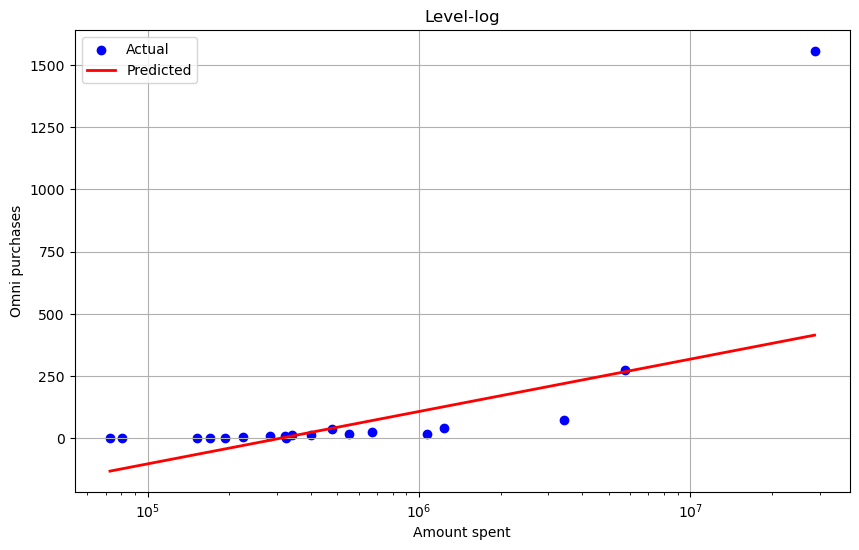

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))

# 실제값 산점도
plt.scatter(np.exp(X_test_log), y_test_log, color='blue', label='Actual')

# 예측값 선 그래프
sorted_idx = X_test_log.ravel().argsort()  # X_test_log를 오름차순으로 정렬한 인덱스
plt.plot(np.exp(X_test_log[sorted_idx]), y_pred_log[sorted_idx], color='red', linewidth=2, label='Predicted')

plt.xscale('log')  # x축 로그 스케일
plt.xlabel('Amount spent')
plt.ylabel('Omni purchases')
plt.title('Level-log')
plt.legend()
plt.grid(True)
plt.show()

- 로그 함수 (전체)

In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                95 non-null     object 
 1   Omni purchases               95 non-null     int64  
 2   Return on ad spend (ROAS)    95 non-null     float64
 3   Website checkouts initiated  95 non-null     int64  
 4   Omni adds to cart            95 non-null     int64  
 5   Amount spent                 95 non-null     int64  
 6   Clicks (all)                 95 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 로드 혹은 생성
# grouped_df = ...

# 로그 변환 적용
X_ad_log = np.log(grouped_df['Amount spent'].values.reshape(-1, 1)+ 1)
y_ad_log = np.log(grouped_df['Omni purchases'].values.reshape(-1, 1)+ 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_ad_log, y_ad_log, test_size=0.2, random_state=42)

# 모델 훈련
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)

# 예측
y_pred_log = model_log.predict(X_test_log)

# 로그 역변환
y_pred_log_inv = np.exp(y_pred_log)
y_test_log_inv = np.exp(y_test_log)

# 평가
mae_log = mean_absolute_error(y_test_log_inv, y_pred_log_inv)
mse_log = mean_squared_error(y_test_log_inv, y_pred_log_inv)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_log_inv, y_pred_log_inv)

print('로그 변환 후 선형 회귀 모델 성능:')
print(f'MAE: {mae_log}')
print(f'MSE: {mse_log}')
print(f'RMSE: {rmse_log}')
print(f'R^2: {r2_log}')

로그 변환 후 선형 회귀 모델 성능:
MAE: 62.06738351197587
MSE: 65908.29910681018
RMSE: 256.72611691608273
R^2: 0.6948755752022784


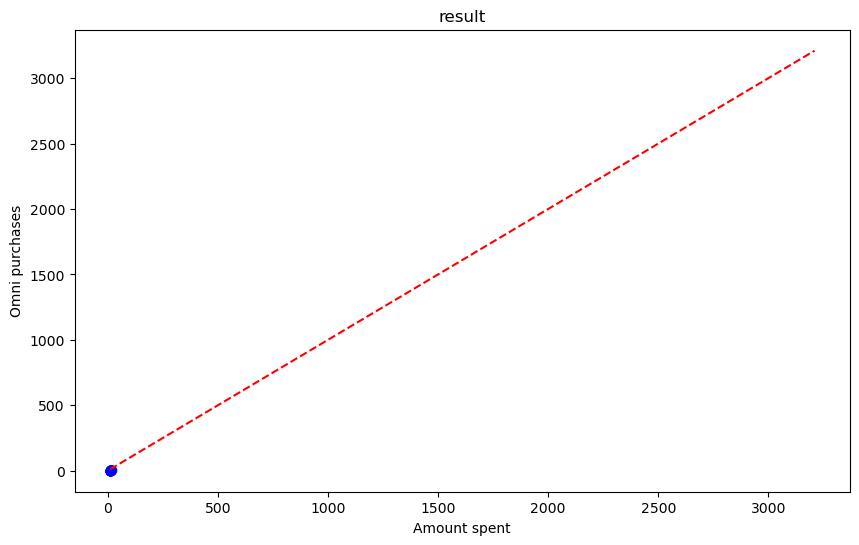

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad_log, y_ad_log, color='blue', alpha=0.5)
plt.plot([X_test_log.min(), y_pred_log_inv.max()], [X_test_log.min(), y_pred_log_inv.max()], color='red', linestyle='--')
plt.xlabel('Amount spent')
plt.ylabel('Omni purchases')
plt.title('result')
plt.show()

In [ ]:
# 절편(intercept) 및 계수(coefficient) 확인
intercept = model_log.intercept_[0]
coefficients = model_log.coef_[0]

print(f"절편 (intercept): {intercept}")
print(f"계수 (coefficient): {coefficients}")

절편 (intercept): -14.064530121167415
계수 (coefficient): [1.26936331]


In [ ]:
# 절편(intercept) 및 계수(coefficient) 확인
intercept = model_log.intercept_[0]
coefficients = model_log.coef_[0][0]

# 완성된 예측 모델의 식 출력
print(f"예측 모델의 식: ln('Omni purchases') = {intercept:.4f} + {coefficients:.4f} * ln('Amount spent')")

예측 모델의 식: ln('Omni purchases') = -14.0645 + 1.2694 * ln('Amount spent')


In [ ]:
# 데이터 확인
print("Max y_ad_log:", np.max(y_ad_log))
print("Min y_ad_log:", np.min(y_ad_log))

Max y_ad_log: 7.644919344958857
Min y_ad_log: -inf


- 로그 함수 (이상치 중 어드밴티지만 제거)

In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                95 non-null     object 
 1   Omni purchases               95 non-null     int64  
 2   Return on ad spend (ROAS)    95 non-null     float64
 3   Website checkouts initiated  95 non-null     int64  
 4   Omni adds to cart            95 non-null     int64  
 5   Amount spent                 95 non-null     int64  
 6   Clicks (all)                 95 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
# 이상치를 일단 제거하고

# x와 y의 평균과 표준 편차 계산
mean_x = grouped_df['Amount spent'].mean()
std_x = grouped_df['Amount spent'].std()
mean_y = grouped_df['Omni purchases'].mean()
std_y = grouped_df['Omni purchases'].std()

# x와 y의 이상치 경계 계산 (3 표준 편차 사용)
lower_bound_x = mean_x - 3 * std_x
upper_bound_x = mean_x + 3 * std_x
lower_bound_y = mean_y - 3 * std_y
upper_bound_y = mean_y + 3 * std_y

# x와 y 모두에서 이상치가 아닌 값 선택
df = grouped_df[(grouped_df['Amount spent'] >= lower_bound_x) & (grouped_df['Amount spent'] <= upper_bound_x) &
                 (grouped_df['Omni purchases'] >= lower_bound_y) & (grouped_df['Omni purchases'] <= upper_bound_y)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                93 non-null     object 
 1   Omni purchases               93 non-null     int64  
 2   Return on ad spend (ROAS)    93 non-null     float64
 3   Website checkouts initiated  93 non-null     int64  
 4   Omni adds to cart            93 non-null     int64  
 5   Amount spent                 93 non-null     int64  
 6   Clicks (all)                 93 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.8+ KB


In [ ]:
# 수동인 거는 다시 포함시켜

# 새로운 행을 기존 데이터프레임에 추가
df = pd.concat([grouped_df[grouped_df['Campaign name'] == '구매전환_레브스톤_21-65_여성_0715'], df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                94 non-null     object 
 1   Omni purchases               94 non-null     int64  
 2   Return on ad spend (ROAS)    94 non-null     float64
 3   Website checkouts initiated  94 non-null     int64  
 4   Omni adds to cart            94 non-null     int64  
 5   Amount spent                 94 non-null     int64  
 6   Clicks (all)                 94 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 로드 혹은 생성
# grouped_df = ...

# 로그 변환 적용
X_ad_log = np.log(df['Amount spent'].values.reshape(-1, 1)+ 1)
y_ad_log = np.log(df['Omni purchases'].values.reshape(-1, 1)+ 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_ad_log, y_ad_log, test_size=0.2, random_state=42)

# 모델 훈련
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)

# 예측
y_pred_log = model_log.predict(X_test_log)

# 로그 역변환
y_pred_log_inv = np.exp(y_pred_log)
y_test_log_inv = np.exp(y_test_log)

# 평가
mae_log = mean_absolute_error(y_test_log_inv, y_pred_log_inv)
mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_log, y_pred_log)

print('로그 변환 후 선형 회귀 모델 성능:')
print(f'MAE: {mae_log}')
print(f'MSE: {mse_log}')
print(f'RMSE: {rmse_log}')
print(f'R^2: {r2_log}')

로그 변환 후 선형 회귀 모델 성능:
MAE: 58.85361275199192
MSE: 0.624637622212273
RMSE: 0.790340193974894
R^2: 0.8215949064031243


In [ ]:
y_pred_log

array([[2.69309626],
       [3.74034352],
       [1.33565119],
       [1.02676749],
       [7.81235172],
       [2.00778226],
       [0.07140479],
       [1.17043553],
       [5.72526582],
       [2.28412893],
       [3.54982409],
       [1.82640517],
       [5.06227227],
       [1.5364552 ],
       [1.99492304],
       [2.50632374],
       [0.2084063 ],
       [2.06562309],
       [2.94982141]])

In [ ]:
y_test_log

array([[2.83321334],
       [3.71357207],
       [0.        ],
       [0.        ],
       [7.35051617],
       [0.        ],
       [1.09861229],
       [1.09861229],
       [5.6167711 ],
       [2.56494936],
       [2.83321334],
       [2.39789527],
       [4.29045944],
       [1.94591015],
       [2.19722458],
       [3.66356165],
       [0.69314718],
       [2.56494936],
       [3.33220451]])

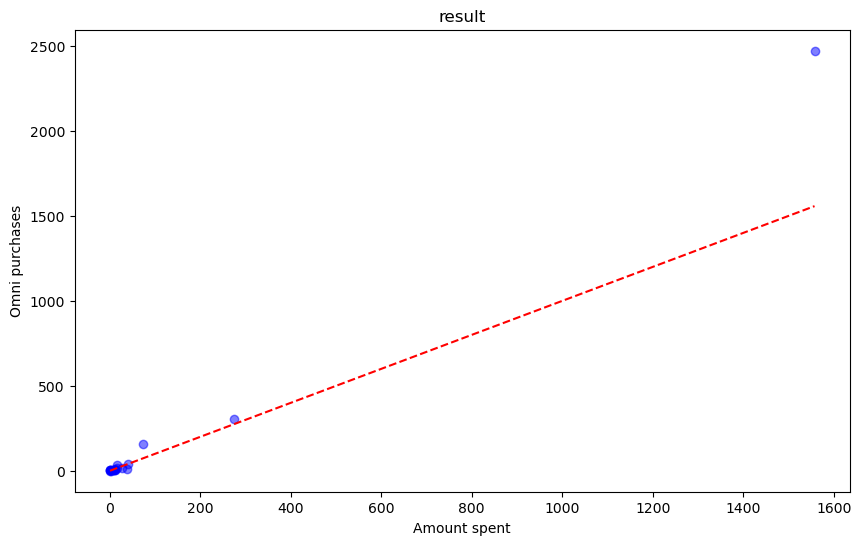

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test_log_inv, y_pred_log_inv, color='blue', alpha=0.5)
plt.plot([y_test_log_inv.min(), y_test_log_inv.max()], [y_test_log_inv.min(), y_test_log_inv.max()], color='red', linestyle='--')
plt.xlabel('Amount spent')
plt.ylabel('Omni purchases')
plt.title('result')
plt.show()

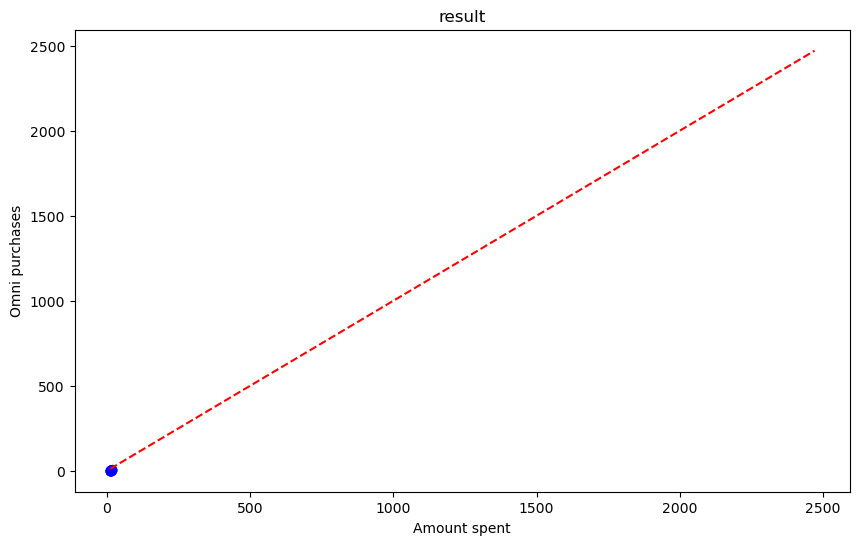

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad_log, y_ad_log, color='blue', alpha=0.5)
plt.plot([X_test_log.min(), y_pred_log_inv.max()], [X_test_log.min(), y_pred_log_inv.max()], color='red', linestyle='--')
plt.xlabel('Amount spent')
plt.ylabel('Omni purchases')
plt.title('result')
plt.show()

In [ ]:
# 절편(intercept) 및 계수(coefficient) 확인
intercept = model_log.intercept_[0]
coefficients = model_log.coef_[0][0]

# 완성된 예측 모델의 식 출력
print(f"예측 모델의 식: ln('Omni purchases') = {intercept:.4f} + {coefficients:.4f} * ln('Amount spent')")

예측 모델의 식: ln('Omni purchases') = -14.4190 + 1.2945 * ln('Amount spent')


- 로그함수 (이상치 제거)

In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                95 non-null     object 
 1   Omni purchases               95 non-null     int64  
 2   Return on ad spend (ROAS)    95 non-null     float64
 3   Website checkouts initiated  95 non-null     int64  
 4   Omni adds to cart            95 non-null     int64  
 5   Amount spent                 95 non-null     int64  
 6   Clicks (all)                 95 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
# 이상치를 일단 제거하고

# x와 y의 평균과 표준 편차 계산
mean_x = grouped_df['Amount spent'].mean()
std_x = grouped_df['Amount spent'].std()
mean_y = grouped_df['Omni purchases'].mean()
std_y = grouped_df['Omni purchases'].std()

# x와 y의 이상치 경계 계산 (3 표준 편차 사용)
lower_bound_x = mean_x - 3 * std_x
upper_bound_x = mean_x + 3 * std_x
lower_bound_y = mean_y - 3 * std_y
upper_bound_y = mean_y + 3 * std_y

# x와 y 모두에서 이상치가 아닌 값 선택
df = grouped_df[(grouped_df['Amount spent'] >= lower_bound_x) & (grouped_df['Amount spent'] <= upper_bound_x) &
                 (grouped_df['Omni purchases'] >= lower_bound_y) & (grouped_df['Omni purchases'] <= upper_bound_y)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                93 non-null     object 
 1   Omni purchases               93 non-null     int64  
 2   Return on ad spend (ROAS)    93 non-null     float64
 3   Website checkouts initiated  93 non-null     int64  
 4   Omni adds to cart            93 non-null     int64  
 5   Amount spent                 93 non-null     int64  
 6   Clicks (all)                 93 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.8+ KB


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 로드 혹은 생성
# grouped_df = ...

# 로그 변환 적용
X_ad_log = np.log(df['Amount spent'].values.reshape(-1, 1)+ 1)
y_ad_log = np.log(df['Omni purchases'].values.reshape(-1, 1)+ 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_ad_log, y_ad_log, test_size=0.2, random_state=42)

# 모델 훈련
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)

# 예측
y_pred_log = model_log.predict(X_test_log)

# 로그 역변환
y_pred_log_inv = np.exp(y_pred_log)
y_test_log_inv = np.exp(y_test_log)

# 평가
mae_log = mean_absolute_error(y_test_log_inv, y_pred_log_inv)
mse_log = mean_squared_error(y_test_log_inv, y_pred_log_inv)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_log_inv, y_pred_log_inv)

print('로그 변환 후 선형 회귀 모델 성능:')
print(f'MAE: {mae_log}')
print(f'MSE: {mse_log}')
print(f'RMSE: {rmse_log}')
print(f'R^2: {r2_log}')

로그 변환 후 선형 회귀 모델 성능:
MAE: 13.74984467842886
MSE: 473.8122406040084
RMSE: 21.76722859263458
R^2: 0.9371768442582858


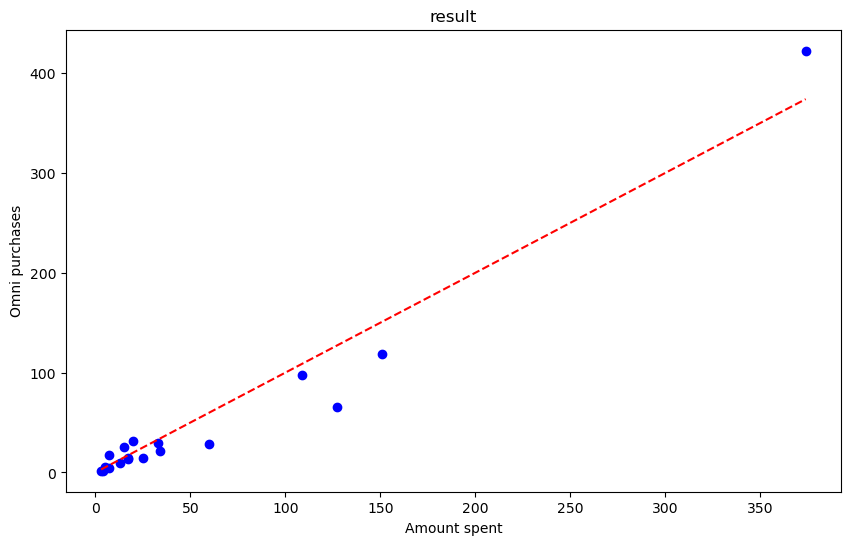

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test_log_inv, y_pred_log_inv, color='blue')
plt.plot([y_test_log_inv.min(), y_test_log_inv.max()], [y_test_log_inv.min(), y_test_log_inv.max()], color='red', linestyle='--')
plt.xlabel('Amount spent')
plt.ylabel('Omni purchases')
plt.title('result')
plt.show()

In [ ]:
# 절편(intercept) 및 계수(coefficient) 확인
intercept = model_log.intercept_[0]
coefficients = model_log.coef_[0][0]

# 완성된 예측 모델의 식 출력
print(f"예측 모델의 식: ln('Omni purchases') = {intercept:.4f} + {coefficients:.4f} * ln('Amount spent')")

예측 모델의 식: ln('Omni purchases') = -14.4744 + 1.2950 * ln('Amount spent')


- 로그 함수 y를

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 로그 변환 적용
X_ad = grouped_df['Amount spent'].values.reshape(-1, 1)
y_ad_log = np.log(grouped_df['Omni purchases'].values.reshape(-1, 1)+ 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_ad, y_ad_log, test_size=0.2, random_state=42)

# 모델 훈련
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)

# 예측
y_pred_log = model_log.predict(X_test_log)

# 로그 역변환
y_pred_log_inv = np.exp(y_pred_log)
y_test_log_inv = np.exp(y_test_log)

# 평가
mae_log = mean_absolute_error(y_pred_log_inv, y_pred_log_inv)
mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_log, y_pred_log)

print('로그 변환 후 선형 회귀 모델 성능:')
print(f'MAE: {mae_log}')
print(f'MSE: {mse_log}')
print(f'RMSE: {rmse_log}')
print(f'R^2: {r2_log}')

로그 변환 후 선형 회귀 모델 성능:
MAE: 0.0
MSE: 3.55336634890672
RMSE: 1.88503749270584
R^2: -0.2515371491137306


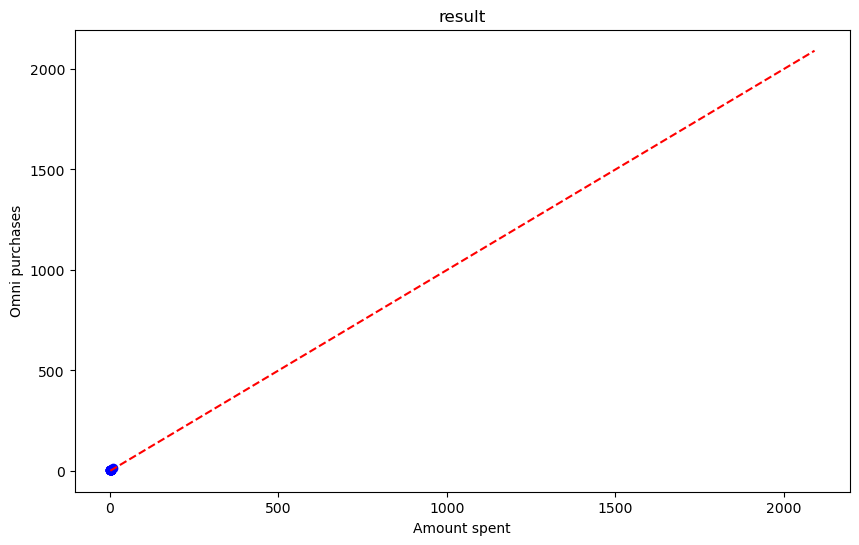

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test_log, y_pred_log, color='blue')
plt.plot([y_test_log_inv.min(), y_test_log_inv.max()], [y_test_log_inv.min(), y_test_log_inv.max()], color='red', linestyle='--')
plt.xlabel('Amount spent')
plt.ylabel('Omni purchases')
plt.title('result')
plt.show()

- 로그함수 x만 로그로 -> 이건 아님

In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                95 non-null     object 
 1   Omni purchases               95 non-null     int64  
 2   Return on ad spend (ROAS)    95 non-null     float64
 3   Website checkouts initiated  95 non-null     int64  
 4   Omni adds to cart            95 non-null     int64  
 5   Amount spent                 95 non-null     int64  
 6   Clicks (all)                 95 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 로드 혹은 생성
# grouped_df = ...

# 로그 변환 적용
X_ad_log = np.log(grouped_df['Amount spent'].values.reshape(-1, 1)+ 1)
y_ad = grouped_df['Omni purchases'].values.reshape(-1, 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_ad_log, y_ad, test_size=0.2, random_state=42)

# 모델 훈련
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)

# 예측
y_pred_log = model_log.predict(X_test_log)

# 로그 역변환
y_pred_log_inv = np.exp(y_pred_log)

# 평가
mae_log = mean_absolute_error(y_test_log_inv, y_pred_log_inv)
mse_log = mean_squared_error(y_test_log_inv, y_pred_log_inv)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_log_inv, y_pred_log_inv)

print('로그 변환 후 선형 회귀 모델 성능:')
print(f'MAE: {mae_log}')
print(f'MSE: {mse_log}')
print(f'RMSE: {rmse_log}')
print(f'R^2: {r2_log}')

로그 변환 후 선형 회귀 모델 성능:
MAE: 2.3827701129956586e+244
MSE: inf
RMSE: inf
R^2: -inf


C:\Users\k6304\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\k6304\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


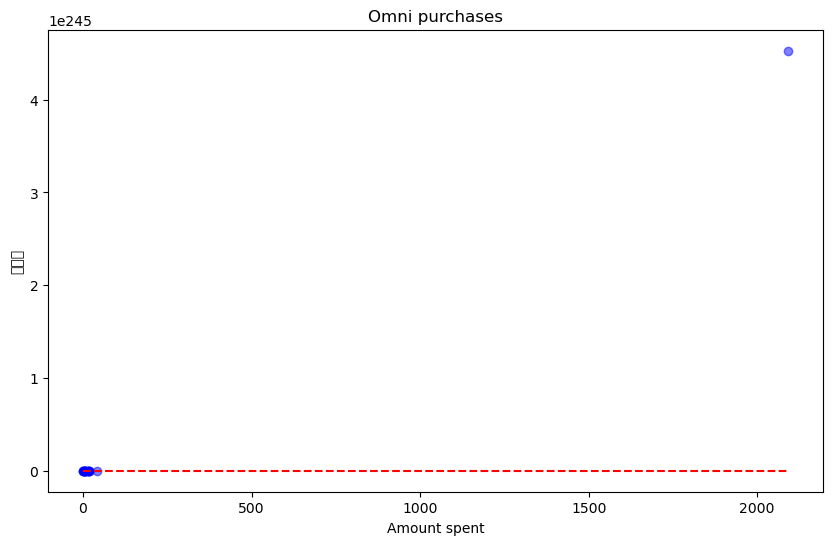

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test_log_inv, y_pred_log_inv, color='blue', alpha=0.5)
plt.plot([y_test_log_inv.min(), y_test_log_inv.max()], [y_test_log_inv.min(), y_test_log_inv.max()], color='red', linestyle='--')
plt.xlabel('Amount spent')
plt.ylabel('예측값')
plt.title('Omni purchases')
plt.show()

- 로그함수 y만 로그로

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 로드 혹은 생성
# grouped_df = ...

# 로그 변환 적용
X_ad = grouped_df['Amount spent'].values.reshape(-1, 1)
y_ad_log = np.log(grouped_df['Omni purchases'].values.reshape(-1, 1)+ 1)

# 학습용 데이터와 테스트용 데이터로 분리
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_ad, y_ad_log, test_size=0.2, random_state=42)

# 모델 훈련
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)

# 예측
y_pred_log = model_log.predict(X_test_log)

# 로그 역변환
y_pred_log_inv = np.exp(y_pred_log)
y_test_log_inv = np.exp(y_test_log)

# 평가
mae_log = mean_absolute_error(y_test_log_inv, y_pred_log_inv)
mse_log = mean_squared_error(y_test_log_inv, y_pred_log_inv)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_log_inv, y_pred_log_inv)

print('로그 변환 후 선형 회귀 모델 성능:')
print(f'MAE: {mae_log}')
print(f'MSE: {mse_log}')
print(f'RMSE: {rmse_log}')
print(f'R^2: {r2_log}')

로그 변환 후 선형 회귀 모델 성능:
MAE: 32669.928074738138
MSE: 20269447480.021355
RMSE: 142370.80978916062
R^2: -93837.00806763787


C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


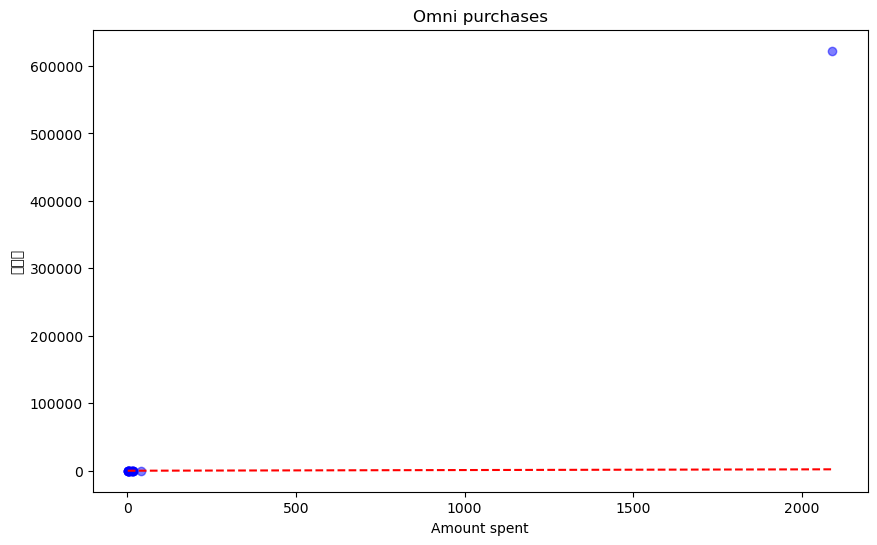

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test_log_inv, y_pred_log_inv, color='blue', alpha=0.5)
plt.plot([y_test_log_inv.min(), y_test_log_inv.max()], [y_test_log_inv.min(), y_test_log_inv.max()], color='red', linestyle='--')
plt.xlabel('Amount spent')
plt.ylabel('예측값')
plt.title('Omni purchases')
plt.show()

- 로그 함수

In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Campaign name                95 non-null     object 
 1   Omni purchases               95 non-null     int64  
 2   Return on ad spend (ROAS)    95 non-null     float64
 3   Website checkouts initiated  95 non-null     int64  
 4   Omni adds to cart            95 non-null     int64  
 5   Amount spent                 95 non-null     int64  
 6   Clicks (all)                 95 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 피처와 타겟 변수 분리
X_ad = grouped_df['Amount spent'].values.reshape(-1, 1)
y_ad = grouped_df['Omni purchases'].values.reshape(-1, 1)

In [ ]:
# 로그 변환 수행
# 로그 변환을 위해서는 값이 양수이어야 합니다.
# 값이 0이거나 음수인 경우에는 로그 변환을 수행할 수 없으므로 적절히 처리해야 합니다.
y_ad_log = np.log(y_ad + 1)  # 여기서 +1을 해주면 0인 값을 처리할 수 있습니다.

# 학습용 데이터와 테스트용 데이터로 분리
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad_log, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_ad, y_train_ad)

# 예측
y_pred_ad = model.predict(X_test_ad)

# 예측 결과를 원래 스케일로 역변환
y_pred = np.exp(y_pred_ad)
y_test = np.exp(y_test_ad)

# 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('선형 단순 회귀 모델 성능:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

선형 단순 회귀 모델 성능:
MAE: 32669.928074738138
MSE: 20269447480.021355
RMSE: 142370.80978916062
R^2: -93837.00806763787


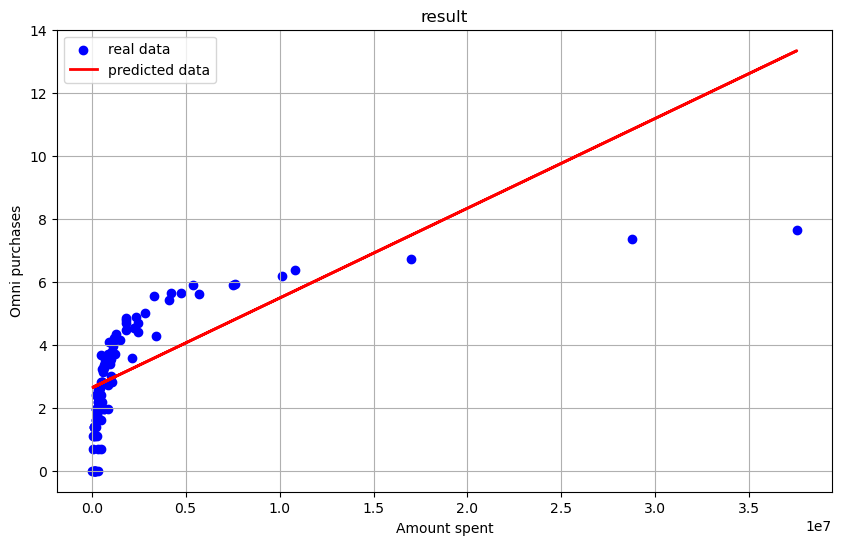

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad, y_ad_log, color='blue', label='real data')
plt.plot(X_test_ad, y_pred_ad, color='red', linewidth=2, label='predicted data')
plt.title('result')
plt.xlabel('Amount spent')
plt.ylabel('Omni purchases')
plt.legend()
plt.grid(True)
plt.show()

- 광고비, 클릭 수

In [ ]:
grouped_df['Clicks (all)'].describe()

count       95.000000
mean      3904.842105
std       8040.969236
min         16.000000
25%        367.000000
50%       1039.000000
75%       3636.000000
max      49656.000000
Name: Clicks (all), dtype: float64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 다항 특성 추가
degree = 2 # 다항식 차수
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(grouped_df[['Amount spent']])

# 다항 회귀 모델 학습
model = LinearRegression()
model.fit(X_poly, grouped_df['Clicks (all)'])

# 예측값 계산
y_pred = model.predict(X_poly)

# 모델 성능 평가
mae = mean_absolute_error(grouped_df['Clicks (all)'], y_pred)
mse = mean_squared_error(grouped_df['Clicks (all)'], y_pred)
r2 = r2_score(grouped_df['Clicks (all)'], y_pred)

print(f'Degree {degree} 다항 회귀 모델 성능:')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

Degree 2 다항 회귀 모델 성능:
MAE: 1439.53
MSE: 7568160.49
R^2: 0.88


C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\l

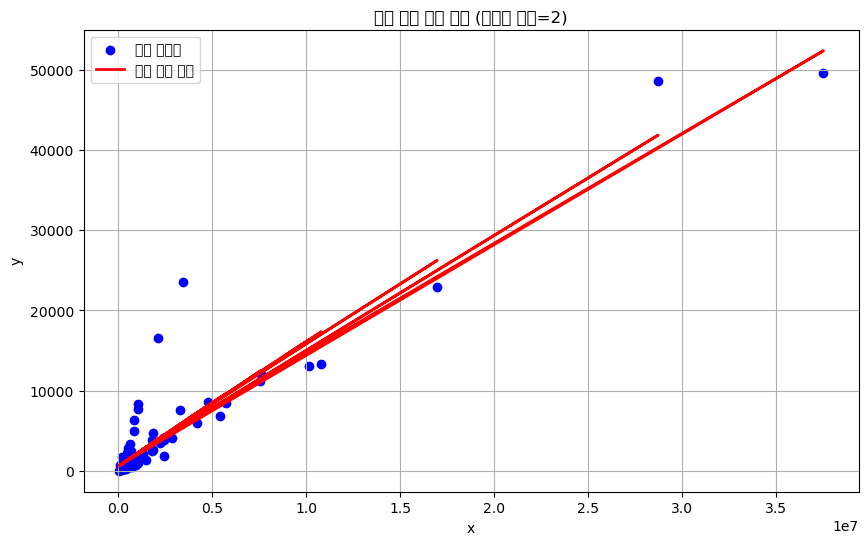

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# 일단 시각화
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df[['Amount spent']], grouped_df['Clicks (all)'], color='blue', label='실제 데이터')
plt.plot(grouped_df[['Amount spent']], y_pred, color='red', linewidth=2, label='다항 회귀 예측')
plt.title(f'다항 회귀 예측 결과 (다항식 차수={degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

> MAE, MSE -> 안 좋다

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 피처와 타겟 변수 분리
X_ad = grouped_df['Amount spent'].values.reshape(-1, 1)
y_ad = grouped_df['Clicks (all)'].values.reshape(-1, 1)



# 학습용 데이터와 테스트용 데이터로 분리
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_ad, y_train_ad)

# 예측
y_pred_ad = model.predict(X_test_ad)

# 평가
mae = mean_absolute_error(y_test_ad, y_pred_ad)
mse = mean_squared_error(y_test_ad, y_pred_ad)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_ad, y_pred_ad)

print('선형 단순 회귀 모델 성능:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

선형 단순 회귀 모델 성능:
MAE: 1585.291003424335
MSE: 7011428.04757405
RMSE: 2647.9101283038385
R^2: 0.9420095440313677


C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anacond

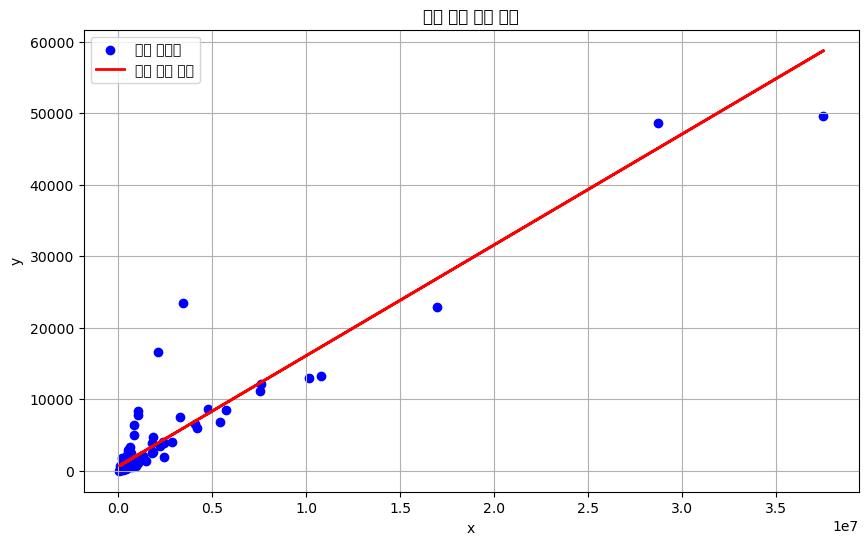

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_ad, y_ad, color='blue', label='실제 데이터')
plt.plot(X_test_ad, y_pred_ad, color='red', linewidth=2, label='선형 회귀 예측')
plt.title('선형 회귀 예측 결과')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

> MAE, MSE -> 안 좋다

In [ ]:
from scipy import stats

# 잔차 계산
residuals =grouped_df['Omni purchases'] - y_pred_ad

# 신뢰 구간 계산
confidence = 0.95
n = len(grouped_df['Amount spent'])
p = 1  # 독립 변수 개수
t_value = stats.t.ppf((1 + confidence) / 2, n - p - 1)
std_error = np.sqrt(np.sum(residuals**2) / (n - p - 1))
margin_of_error = t_value * std_error

# 신뢰 구간
lower_bound = y_pred - margin_of_error
upper_bound = y_pred + margin_of_error

# 예측값과 신뢰 구간 시각화
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['Amount spent'], grouped_df['Omni purchases'], color='blue', label='실제 데이터')
plt.plot(grouped_df['Amount spent'], y_pred, color='red', label='선형 회귀 예측')
plt.fill_between(grouped_df['Amount spent'], lower_bound, upper_bound, color='lightgray', alpha=0.5, label=f'{int(confidence*100)}% 신뢰 구간')
plt.title('선형 회귀 예측과 신뢰 구간')
plt.xlabel('광고비')
plt.ylabel('ROAS')
plt.legend()
plt.grid(True)
plt.show()

ValueError: Length of values (19) does not match length of index (95)

In [ ]:
연습

Mean Squared Error (MSE): 24.28
R^2 Score: 0.57


C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\l

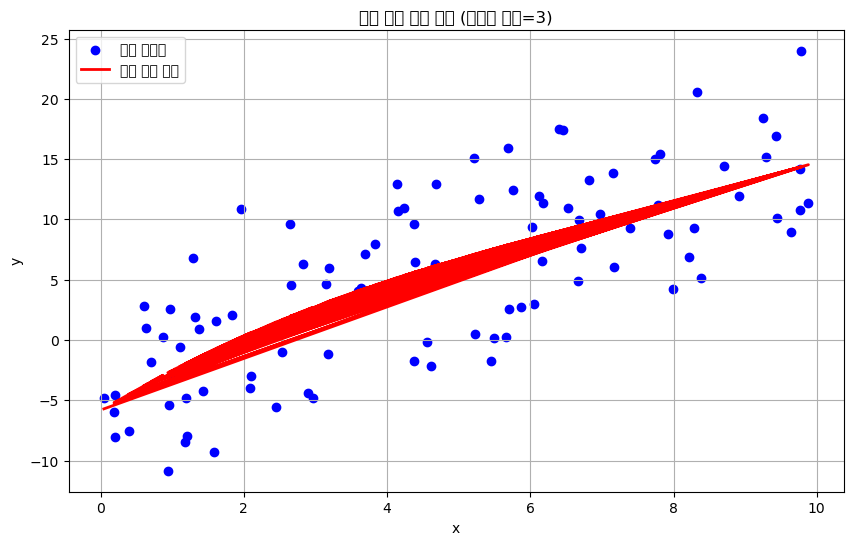

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# 예시 데이터 생성
np.random.seed(0)
n_samples = 100
x = 10 * np.random.rand(n_samples)
y = 2 * x - 5 + np.random.randn(n_samples) * 5  # 임의의 선형 관계를 가정한 데이터 생성

# 다항 회귀에 사용할 x 데이터 준비
x = x[:, np.newaxis]  # 차원을 추가하여 열 벡터로 변환

# 다항 회귀 모델 학습
poly_degree = 3  # 다항식의 차수
poly_features = PolynomialFeatures(degree=poly_degree)
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

# 학습된 모델로 예측값 계산
y_pred = model.predict(x_poly)

# 모델 성능 평가
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='실제 데이터')
plt.plot(x, y_pred, color='red', linewidth=2, label='다항 회귀 예측')
plt.title(f'다항 회귀 예측 결과 (다항식 차수={poly_degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error (MSE): 3.97
R^2 Score: 0.89


C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anacond

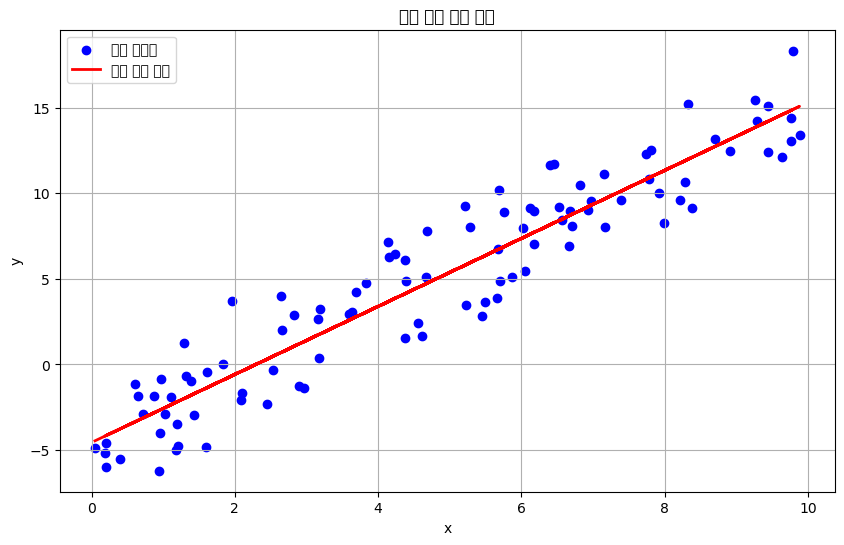

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 예시 데이터 생성
np.random.seed(0)
n_samples = 100
x = 10 * np.random.rand(n_samples)
y = 2 * x - 5 + np.random.randn(n_samples) * 2  # 임의의 선형 관계를 가정한 데이터 생성

# 선형 회귀에 사용할 x 데이터 준비
x = x[:, np.newaxis]  # 차원을 추가하여 열 벡터로 변환

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(x, y)

# 학습된 모델로 예측값 계산
y_pred = model.predict(x)

# 모델 성능 평가
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='실제 데이터')
plt.plot(x, y_pred, color='red', linewidth=2, label='선형 회귀 예측')
plt.title('선형 회귀 예측 결과')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Mean Absolute Error: 4.440892098500626e-16


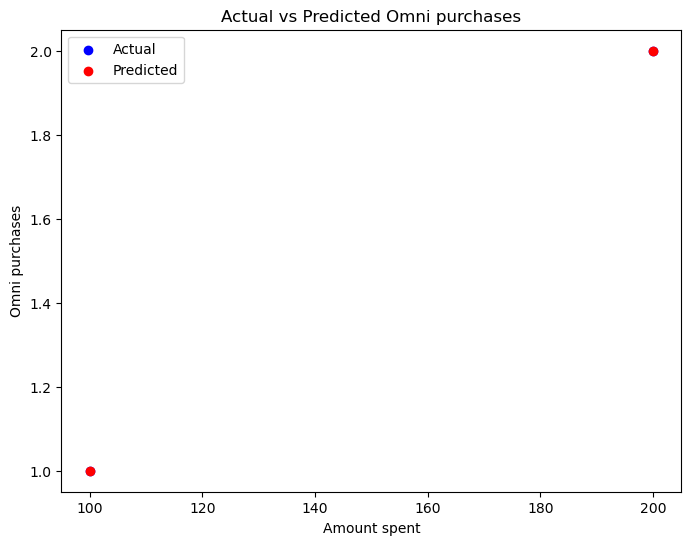

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# 예제 데이터프레임 생성
data = {
    'Amount spent': [100, 200, 300, 400, 500, 600, 700],
    'Omni purchases': [1, 2, 4, 8, 16, 32, 64]
}
df = pd.DataFrame(data)

# 독립 변수(X)와 종속 변수(y) 설정
X = df['Amount spent'].values.reshape(-1, 1)
y = df['Omni purchases'].values.reshape(-1, 1)

# 종속 변수에 로그 변환 적용
y_log = np.log(y)

# 데이터셋을 학습셋과 테스트셋으로 분할
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train_log)

# 테스트셋으로 예측 수행
y_pred_log = model.predict(X_test)

# 예측 결과를 원래 스케일로 역변환
y_pred = np.exp(y_pred_log)
y_test = np.exp(y_test_log)

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# 시각화 - 예측 결과와 실제 값 비교
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Omni purchases')
plt.xlabel('Amount spent')
plt.ylabel('Omni purchases')
plt.legend()
plt.show()


a 추정값: 1.404959208203676
b 추정값: 0.374753881091905


C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\k6304\anaconda3\li

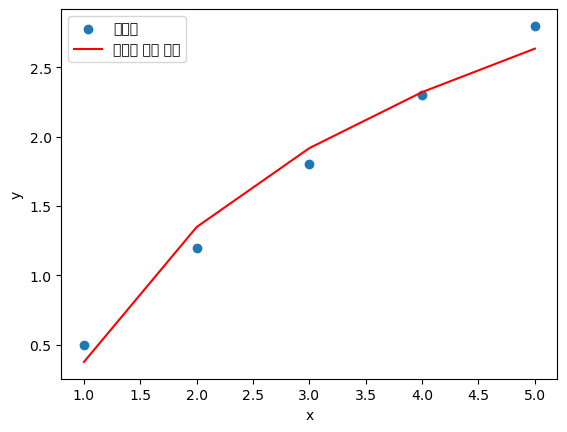

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 주어진 데이터
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([0.5, 1.2, 1.8, 2.3, 2.8])

# 로그 함수 모델 정의
def log_func(x, a, b):
    return a * np.log(x) + b

# curve_fit을 사용하여 파라미터 추정
params, covariance = curve_fit(log_func, x_data, y_data)

# 추정된 파라미터 출력
a_est, b_est = params
print(f"a 추정값: {a_est}")
print(f"b 추정값: {b_est}")

# 데이터와 추정된 모델 시각화
plt.scatter(x_data, y_data, label='데이터')
plt.plot(x_data, log_func(x_data, a_est, b_est), color='red', label='추정된 로그 함수')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
